In [1]:
import logging
import pandas as  pd
log_file=r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\error_analysis.log"

In [2]:
logging.basicConfig(
    filename=log_file,
    filemode='a',
    level=logging.INFO,
    format="%(asctime)s-%(levelname)s-%(message)s"
)
logging.info('Analysis started!')

In [3]:
import os
import sys
sys.path.append(r"C:\Users\Rasulbek907\Desktop\Project_MP\Scripts")

In [4]:
from data_load import DataLoader

In [5]:
path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Feature_Selection"
loader = DataLoader(path)

In [6]:

df = loader.load_datasets()

In [7]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8493 entries, 0 to 8492
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        8493 non-null   int64  
 1   Unnamed: 0          8493 non-null   int64  
 2   Video ID            8493 non-null   int64  
 3   Video Title         8493 non-null   int64  
 4   Channel             8493 non-null   int64  
 5   Published Date      8493 non-null   float64
 6   Views               8493 non-null   int64  
 7   Likes               8493 non-null   int64  
 8   Comments            8493 non-null   int64  
 9   Subscribers         8493 non-null   int64  
 10  Channel Views       8493 non-null   int64  
 11  Country             8493 non-null   int64  
 12  Region              8493 non-null   int64  
 13  CategoryID          8493 non-null   int64  
 14  CategoryName        8493 non-null   int64  
 15  Cluster             8493 non-null   int64  
 16  Catego

In [9]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [10]:
num_col = df.select_dtypes(include=[np.number]).columns.drop('CategoryName').tolist()
cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [11]:
for col in cat_col:
    df[col]=df[col].astype(str)

In [12]:
if 'CategoryName' not in df.columns:
    print("⚠️ Column 'CategoryName' not found. Available columns are:")
    print(df.columns.tolist())
else:
    
    X = df.drop('CategoryName', axis=1)
    y = df['CategoryName']

In [13]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',MinMaxScaler())

])

In [14]:

num_pipeline

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,feature_range,"(0, ...)"


In [15]:
cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

In [16]:
cat_pipeline

,steps,"[('imputer', ...), ('encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,'auto'


In [17]:
preprocessor=ColumnTransformer([
    
        ('num',num_pipeline,num_col),
        ('cat',cat_pipeline,cat_col)
    
])

In [18]:

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [19]:
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression(random_state=42))
])

In [20]:

pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [23]:
from sklearn.model_selection import train_test_split

# 🎯 Target ustun nomi
target_col = "CategoryName"

# 📊 X va y ni ajratamiz
X = df.drop(columns=[target_col])
y = df[target_col]

# 🔀 Train-test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [25]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.dropna(subset=[y_train.name if y_train.name else 'target'], inplace=True)

X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

In [26]:

X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [27]:
pipeline.fit(X_train, y_train)

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Modeldan bashorat olish
y_pred = pipeline.predict(X_test)

# 2️⃣ Asosiy metrikalar
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy, 4))

# 3️⃣ Kengaytirilgan hisobot
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 4️⃣ Confusion matrix (ko‘rinish uchun)
cm = confusion_matrix(y_test, y_pred)
print("\n🧩 Confusion Matrix:\n", cm)


✅ Accuracy: 0.1083

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.11      0.11       229
           1       0.02      0.01      0.02        68
           2       0.18      0.18      0.18       260
           3       0.07      0.06      0.06       109
           4       0.07      0.07      0.07       120
           5       0.11      0.10      0.10       194
           6       0.07      0.06      0.06       143
           7       0.11      0.12      0.12       143
           8       0.14      0.14      0.14       192
           9       0.11      0.13      0.12       140
          10       0.05      0.05      0.05       101

    accuracy                           0.11      1699
   macro avg       0.09      0.09      0.09      1699
weighted avg       0.11      0.11      0.11      1699


🧩 Confusion Matrix:
 [[25  6 29 14 17 26 23 20 22 26 21]
 [19  1 12  4  4  7  5  8  2  3  3]
 [31  9 48 16 17 29 17 20 28 27 18]
 [15  5 22  

# Error Analysis

In [31]:
import numpy as np

# errors va abs_errors ni hisoblaymiz
errors = y_test_clean - y_pred
abs_errors = np.abs(errors)

# Natijalarni jadval ko‘rinishida ko‘rsatish uchun pandas DataFrame yasaymiz
import pandas as pd

errors_df = pd.DataFrame({
    'Actual': y_test_clean,
    'Predicted': y_pred,
    'Error': errors,
    'Absolute Error': abs_errors
})

print(errors_df.head())

      Actual  Predicted  Error  Absolute Error
8219       8          0      8               8
4977       6          4      2               2
1535       9          9      0               0
5046       8          2      6               6
7445       5          8     -3               3


In [32]:
errors_df = errors_df.reset_index(drop=True)
x_test_reset = x_test_clean.reset_index(drop=True)

In [33]:
full_errors_df = pd.concat([x_test_reset, errors_df], axis=1)

In [34]:
print(full_errors_df.head())

   Unnamed: 0.1  Unnamed: 0  Video ID  Video Title  Channel  Published Date  \
0          8219        8219      4814         3913     6171        0.748762   
1          4977        4977      7007         3277     1495        0.681745   
2          1535        1535      3895          732     5767        0.894290   
3          5046        5046      3708          698     1324        0.962212   
4          7445        7445      4876         2958     5042        0.708941   

     Views   Likes  Comments  Subscribers  ...   DayName  Views_per_Sub  \
0  1027877   22290      2479        11900  ...  0.333333      86.368961   
1  1349365   32471       149      1770000  ...  1.000000       0.762353   
2  1576670   14222       529        25900  ...  0.666667      60.872939   
3  2993196  104085      1096      1340000  ...  0.500000       2.233727   
4  5289851  329305      5280     19800000  ...  0.666667       0.267164   

   Engagement  Like_per_Sub  Comment_per_Sub             source_file  Actu

In [35]:

print(full_errors_df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Video ID', 'Video Title', 'Channel',
       'Published Date', 'Views', 'Likes', 'Comments', 'Subscribers',
       'Channel Views', 'Country', 'Region', 'CategoryID', 'Cluster',
       'CategoryID_enc', 'VideoCluster', 'Channel_Cluster', 'Video_Cluster',
       'Country_Cluster_x', 'Category_Cluster_x', 'Year', 'Month', 'Day',
       'DayOfWeek', 'DayName', 'Views_per_Sub', 'Engagement', 'Like_per_Sub',
       'Comment_per_Sub', 'source_file', 'Actual', 'Predicted', 'Error',
       'Absolute Error'],
      dtype='object')


In [38]:
error_cols = full_errors_df[['Video Title', 'Error', 'Absolute Error']]
print(error_cols.head(10))

   Video Title  Error  Absolute Error
0         3913      8               8
1         3277      2               2
2          732      0               0
3          698      6               6
4         2958     -3               3
5         2986      3               3
6         7812     -6               6
7         1466      8               8
8         7443     -8               8
9         4168      3               3


# Worst Prediction

In [39]:
# 4️⃣ Sort by largest absolute errors
worst_predictions = full_errors_df.sort_values(by='Absolute Error', ascending=False).head(10)

print("🔎 Top 10 Worst Predictions:")
display(worst_predictions[['Actual', 'Predicted', 'Error', 'Absolute Error']])

🔎 Top 10 Worst Predictions:


,Actual,Predicted,Error,Absolute Error
1444,0,10,-10,10
1694,0,10,-10,10
897,10,0,10,10
869,10,0,10,10
748,0,10,-10,10
54,10,0,10,10
1536,0,10,-10,10
1191,10,0,10,10
553,0,10,-10,10
902,0,10,-10,10


# Error Distribution

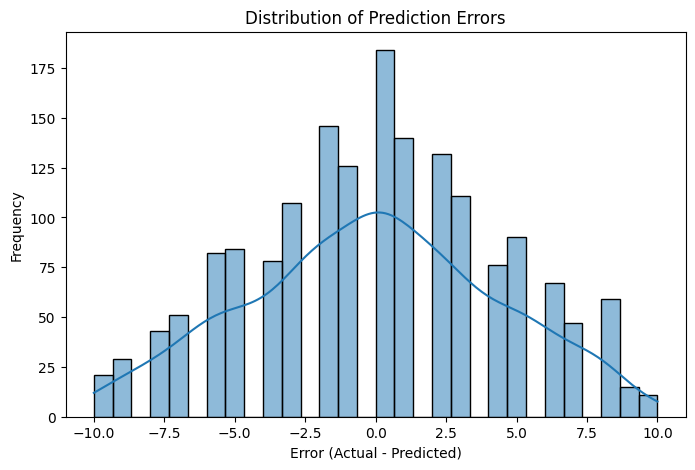

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

# Actual vs Predicted

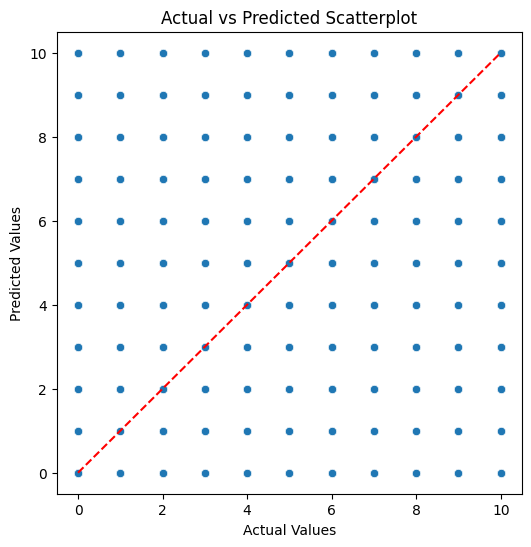

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_clean, y=y_pred)
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'r--')  # Ideal chiziq
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatterplot")
plt.show()